<a href="https://colab.research.google.com/github/umanari145/python_ai/blob/main/zerokara_data_case01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 8.6 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=ec9295e96d675a92a02c910f8bb1cc8944dc382efedf799f2fe38d144af243f5
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [49]:
import pandas as pd
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import japanize_matplotlib
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/My Drive/bento_train.csv')
test = pd.read_csv('/content/drive/My Drive/bento_test.csv')
sample = pd.read_csv('/content/drive/My Drive/bento_sample.csv', header=None)

train.head()
test.head()
sample.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60


In [11]:
trainX=train["temperature"]
y = train["y"]


testX=test["temperature"]
# reshapeについて配列の整形 https://shikaku-mafia.com/numpy-reshape/
trainX2 = trainX.values.reshape(-1,1)
testX2 = testX.values.reshape(-1,1)
#print(trainX)
#print(trainX2)

## モデリングについて

In [15]:
# 単回帰モデル
model1 = LR()
model1.fit(trainX2, y)

LinearRegression()

In [16]:
# 傾き
model1.coef_

array([-2.5023821])

In [17]:
#切片
model1.intercept_

134.79948383749922

In [19]:
pred = model1.predict(testX2)
pred

array([ 84.25136537,  74.99255159,  62.9811175 ,  80.99826864,
        79.49683938,  76.49398085,  78.49588653,  69.48731097,
        67.73564349,  95.76232304,  88.25517673,  77.24469548,
        74.99255159,  84.25136537,  96.01256125,  98.01446693,
        88.00493852,  77.99541011,  87.00398568,  85.75279463,
        85.75279463,  87.75470031,  87.5044621 ,  94.7613702 ,
        86.75374747,  84.50160358,  81.74898327,  98.01446693,
        98.76518156,  86.00303284,  95.26184662,  99.01541977,
        94.51113199,  97.51399051, 108.52447176,  97.51399051,
       106.27232787, 111.7775685 ,  97.01351409,  96.51303767])

In [20]:
sample.head(10)

,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60
5,2014-10-8,44
6,2014-10-9,64
7,2014-10-10,33
8,2014-10-14,67
9,2014-10-15,28


In [21]:
# 単回帰モデルの代入
sample[1] = pred
sample.head()

,0,1
0,2014-10-1,84.251365
1,2014-10-2,74.992552
2,2014-10-3,62.981117
3,2014-10-6,80.998269
4,2014-10-7,79.496839


In [22]:
# 実際の出力
sample.to_csv('/content/drive/My Drive/bento_submit.csv', index=None, header=None)

## 重回帰分析

In [28]:
train["week"].value_counts()

# カテゴリーデータをフラグ化できる
pd.get_dummies(train["week"])

# フラグ化できるか否かはプログラムが自動的に判定
trainX=pd.get_dummies(train[["week", "temperature"]])
trainX

,temperature,week_月,week_木,week_水,week_火,week_金
0,19.8,1,0,0,0,0
1,17.0,0,0,0,1,0
2,15.5,0,0,1,0,0
3,15.2,0,1,0,0,0
4,16.1,0,0,0,0,1
...,...,...,...,...,...,...
202,24.8,0,0,1,0,0
203,25.4,0,1,0,0,0
204,27.1,0,0,0,0,1
205,26.6,1,0,0,0,0


In [30]:
y=train["y"]
model2 = LR()
model2.fit(trainX, y)

# 傾き
print(model2.coef_)
# 切片
print(model2.intercept_)

[-2.53878074  8.26339936 -9.47240196 -2.02873774  1.85251984  1.38522051]
135.69119841401601


In [34]:
testX=pd.get_dummies(test[["week", "temperature"]])
pred=model2.predict(testX)
pred
sample[1] = pred
sample.to_csv('/content/drive/My Drive/bento_submit2.csv', index=None, header=None)

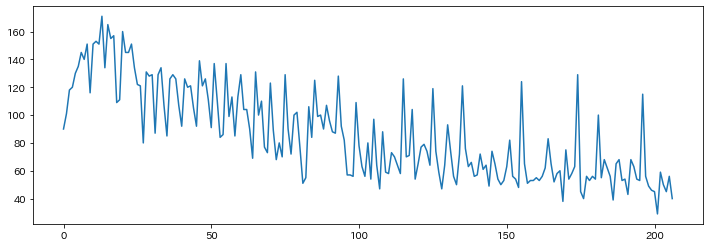

In [38]:
# 時系列の情報が重要ではないか・・・？と考える
train["y"].plot(figsize=(12,4))


In [59]:
train["year"] = train["datetime"].apply(lambda x : x.split("-")[0])
train["month"]= train["datetime"].apply(lambda x : x.split("-")[1])
test["year"] = test["datetime"].apply(lambda x : x.split("-")[0])
test["month"] = test["datetime"].apply(lambda x : x.split("-")[1])


In [67]:
train["year"] = train["year"].astype(np.int32)
train["month"]= train["month"].astype(np.int32)
test["year"] = test["year"].astype(np.int32)
test["month"] = test["month"].astype(np.int32)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       40 non-null     object 
 1   week           40 non-null     object 
 2   soldout        40 non-null     int64  
 3   name           40 non-null     object 
 4   kcal           36 non-null     float64
 5   remarks        7 non-null      object 
 6   event          3 non-null      object 
 7   payday         2 non-null      float64
 8   weather        40 non-null     object 
 9   precipitation  40 non-null     object 
 10  temperature    40 non-null     float64
 11  year           40 non-null     int32  
 12  month          40 non-null     int32  
dtypes: float64(3), int32(2), int64(1), object(7)
memory usage: 3.9+ KB


In [72]:
model3=LR()
trainX=train[["year", "month"]]
model3.fit(trainX, y)

# 傾き
print(model3.coef_)
# 切片
print(model3.intercept_)

testX=test[["year", "month"]]
pred=model3.predict(testX)
print(pred)
sample[1]=pred
sample.to_csv('/content/drive/My Drive/bento_submit3.csv', index=None, header=None)

[-104.0107109    -7.41004428]
209594.15656370905
[42.48436184 42.48436184 42.48436184 42.48436184 42.48436184 42.48436184
 42.48436184 42.48436184 42.48436184 42.48436184 42.48436184 42.48436184
 42.48436184 42.48436184 42.48436184 42.48436184 42.48436184 42.48436184
 42.48436184 42.48436184 42.48436184 42.48436184 35.07431756 35.07431756
 35.07431756 35.07431756 35.07431756 35.07431756 35.07431756 35.07431756
 35.07431756 35.07431756 35.07431756 35.07431756 35.07431756 35.07431756
 35.07431756 35.07431756 35.07431756 35.07431756]
